<a href="https://colab.research.google.com/github/parulsharma098/EDA-Project-Progress/blob/main/EDA_ANALYSIS_DAY_2_(Global_Terrorism_Analysis)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [5]:
#FIRSTLY TO WORK ON CLEANING THE DATA WE WILL IMPORT SOME IMPORTANT LIBRARIES IN OUR GOOGLE COLAB.
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
#MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#IMPORTING REQUIRED DATA FROM THE DRIVE
path = '/content/drive/MyDrive/Capstone project/Global_Terrorism_Data (1).csv'
terrorism_data = pd.read_csv(path, encoding='ISO-8859-1')
terrorism_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
terrorism_data.info(verbose= True, null_counts = True)

In [ ]:
terrorism_data.head(2)

In [ ]:
list(terrorism_data.columns)

In [ ]:
terrorism_data.describe()

In [ ]:
# CHECKING THE SHAPE OF THE DATA

terrorism_data.shape

# SORTING OUT THE COLUMNS WHICH WILL BE NEEDED FOR ANALYSIS.

---



In [64]:
terrorism_data_new = terrorism_data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city','latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'ransom']]

In [ ]:
#CHECKING THE NEW SORTED DATA 
terrorism_data_new.head()

In [ ]:
terrorism_data_new.shape

In [67]:
#RENAMING THE SORTED COLUMNS
terrorism_data_new = terrorism_data_new.rename(columns= {'iyear' : 'year','imonth' : 'month', 'iday' : 'day', 'country_txt' : 'country', 'region_txt' : 'region', 'provstate' : 'state', 'attacktype1_txt' : 'attack_type', 'targtype1_txt' : 'target_type', 'gname' : 'gang_name', 'weaptype1_txt' : 'weapon_type', 'nkill' : 'no_of_kills'  })

In [68]:
terrorism_data_new.head(2)

,year,month,day,country,region,state,city,latitude,longitude,success,attack_type,target_type,gang_name,weapon_type,no_of_kills,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [69]:
terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  171378 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [70]:
#REASSESSMENT OF 'NAN' VALUES FOR BETTER ANALYSIS.
 
terrorism_data_new['state'] = terrorism_data_new['state'].fillna('unknown')
terrorism_data_new['city'] = terrorism_data_new['city'].fillna('unknown')
terrorism_data_new['no_of_kills'] = terrorism_data_new['no_of_kills'].fillna(0)

In [ ]:
terrorism_data_new.info()

In [ ]:
terrorism_data_new.isnull().sum()

# ALL THE HOT ZONES FOR TERRORIST ATTACKS.

In [ ]:
#INSTALLING GEOPANDAS FOR HEATMAPS
!pip install geopandas 

In [ ]:
#UPGRADING GEOPANDAS
!pip install --upgrade geopandas

In [84]:
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
#USING GEOPANDAS TO CONVERT LOGITUDE AND LATITUDE INTO POINTS
df_geo = gpd.GeoDataFrame(terrorism_data_new, geometry = gpd.points_from_xy(terrorism_data_new.longitude, terrorism_data_new.latitude))

In [ ]:
df_geo

In [ ]:
#Get built-in data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [87]:
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


NameError: ignored

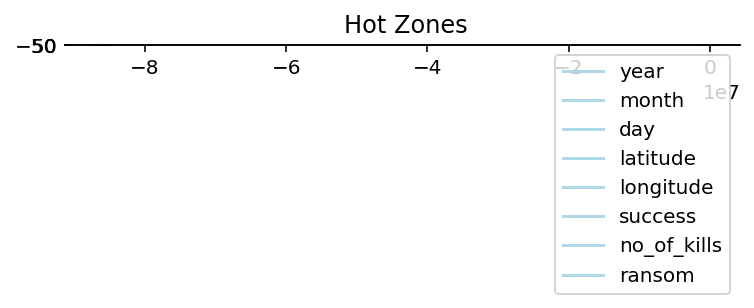

In [90]:
#Plotting the Hot_Zones
axis = terrorism_data_new[terrorism_data_new.country=='America'].plot(color = 'lightblue')

df_geo.plot(ax  = axis , color = 'black')
plt.title("Hot Zones")
fig.set_size_inches(9,6)
fig.savefig('matplot.png', dpi = 200)
plt.show

In [92]:
f = px.choropleth(terrorism_data_new, locationmode = 'country names', location = terrorism_data_new['region'], scope = 'America', color = terrorism_data_new['country'])
f.show()

TypeError: ignored

#Terrorist Attacks by Years

In [93]:
yearly_trend = terrorism_data_new.year.value_counts().sort_index(ascending=True)

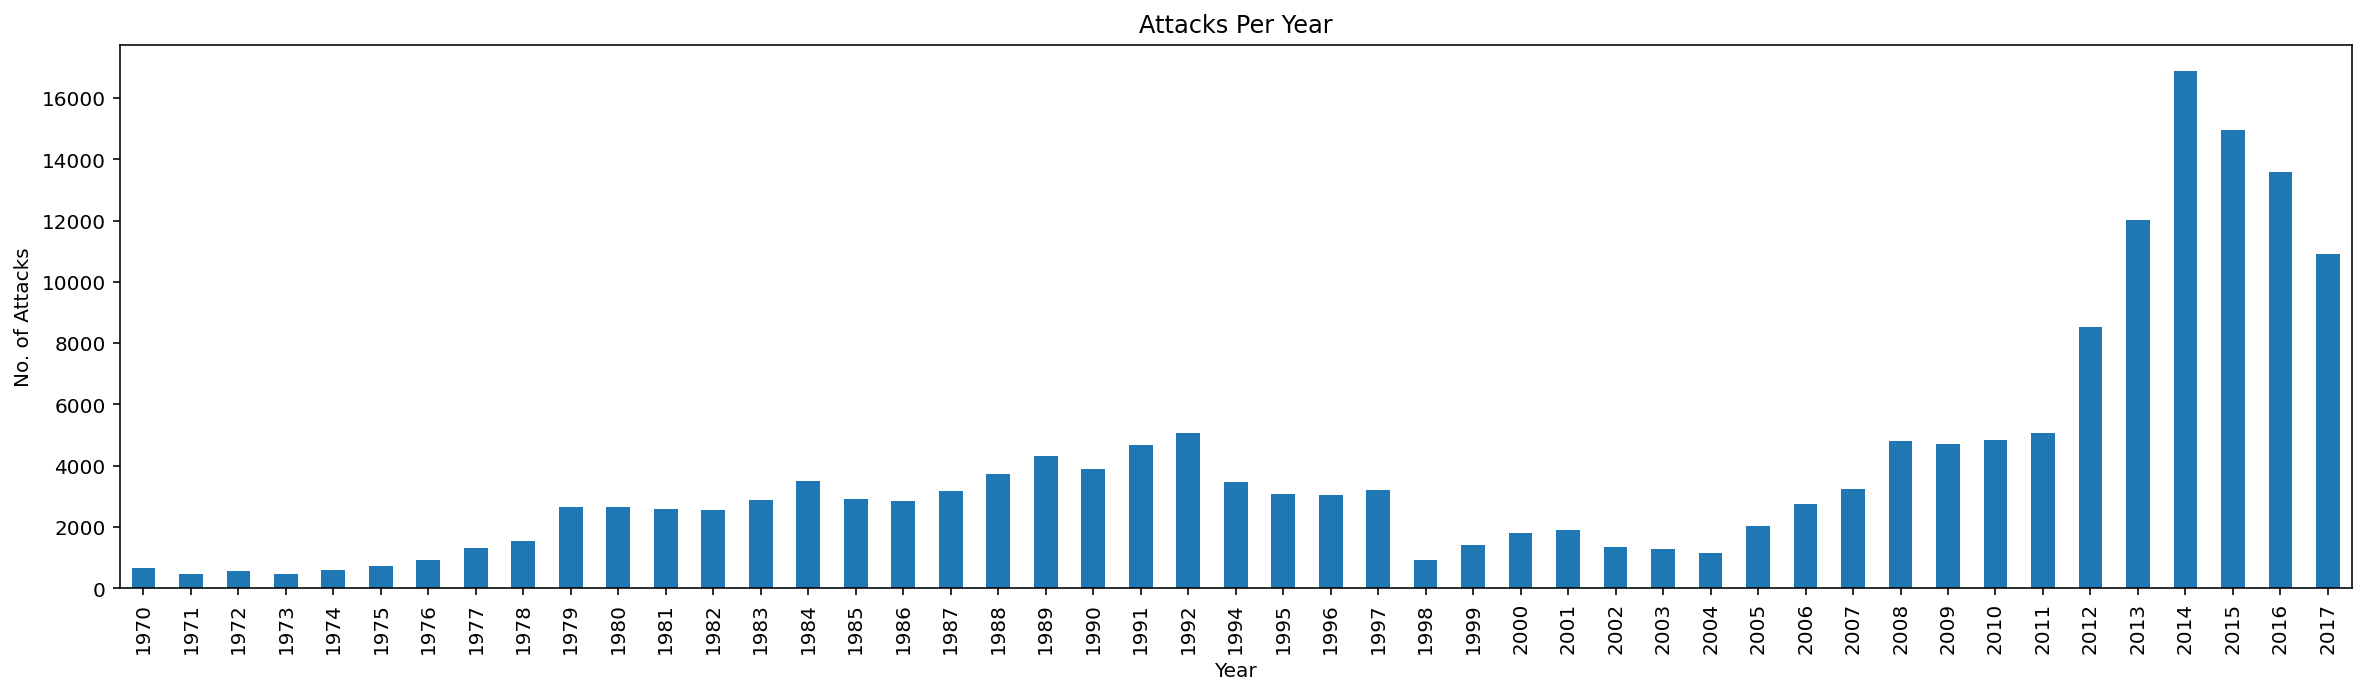

In [95]:
yearly_trend.plot(kind = 'bar')

plt.title('Attacks Per Year')
plt.ylabel('No. of Attacks')
plt.xlabel('Year')

plt.rcParams['figure.figsize'] = (20, 5)

#TOP 10 ATTACKED COUNTRIES

In [ ]:
top_10_countries = terrorism_data_new['country'].value_counts().head(10)
top_10_countries

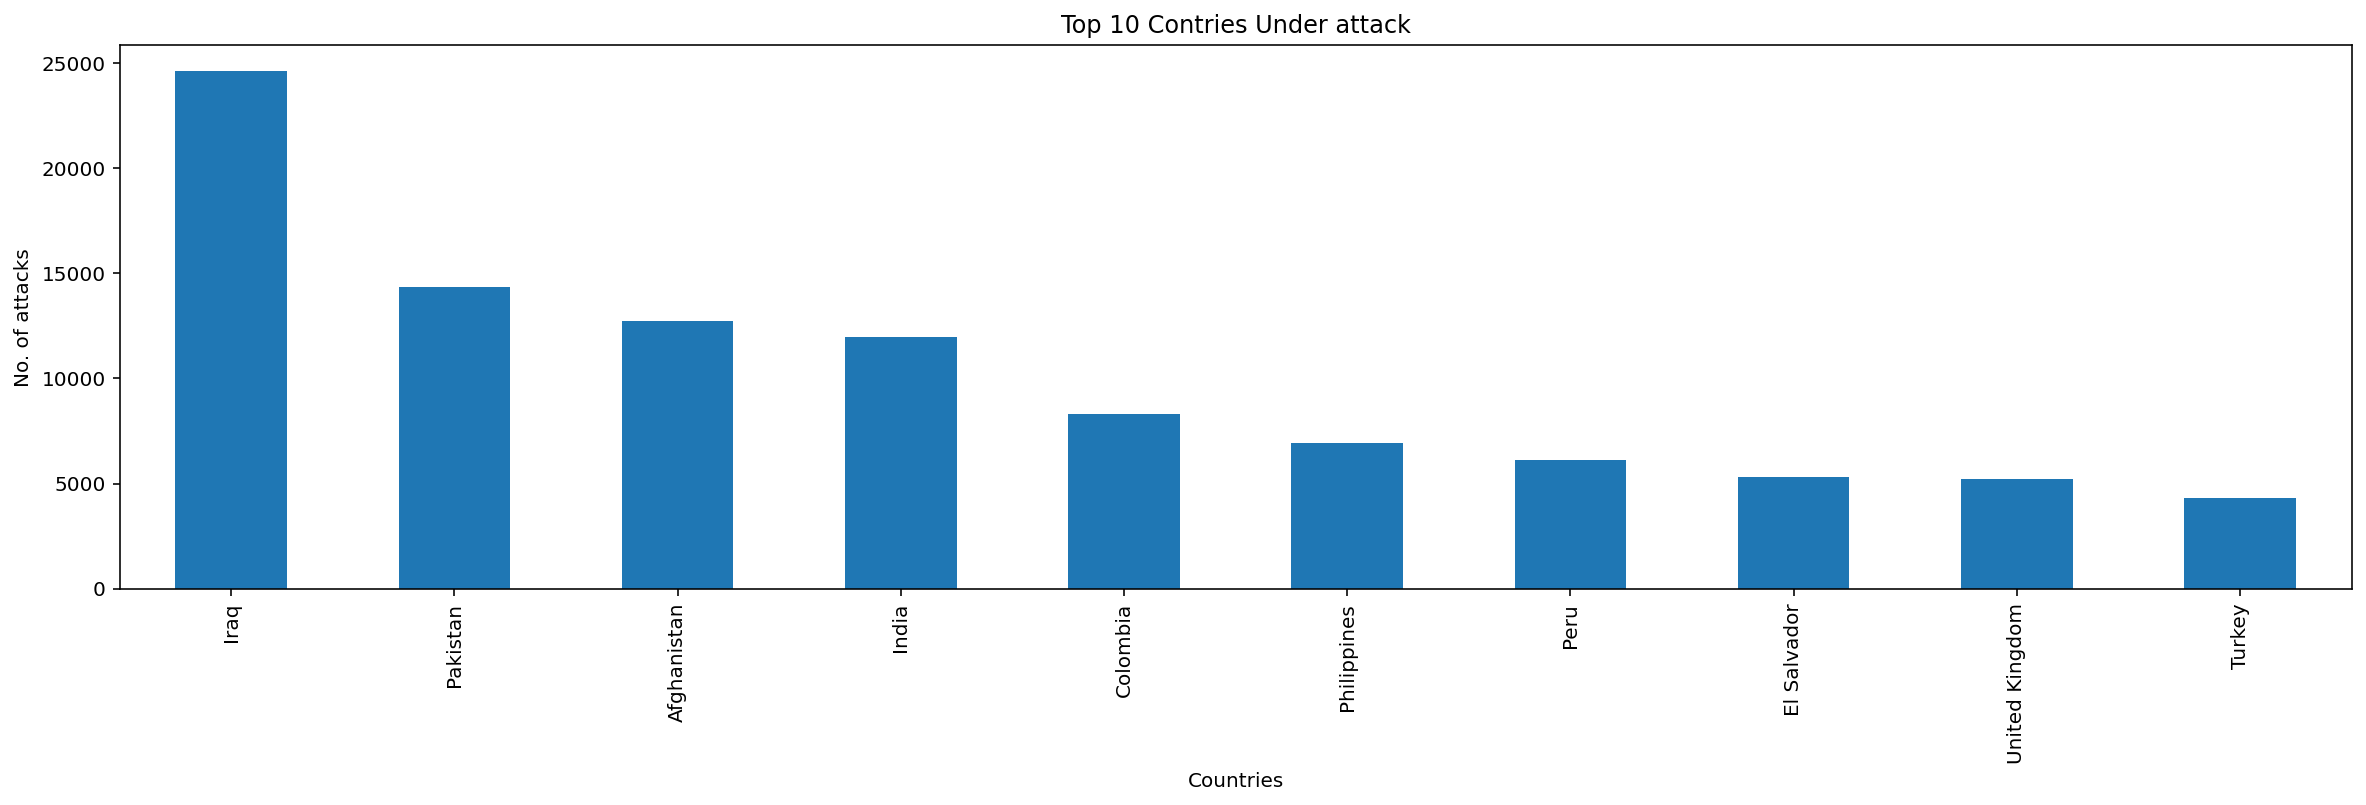

In [97]:
top_10_countries.plot(kind = 'bar')

plt.title('Top 10 Contries Under attack')
plt.ylabel('No. of attacks')
plt.xlabel('Countries')

plt.rcParams['figure.figsize'] = (10, 5)

#TOP 5 STATES UNDER ATTACK.

In [98]:
top_5_states = terrorism_data_new['state'].value_counts().head(10)

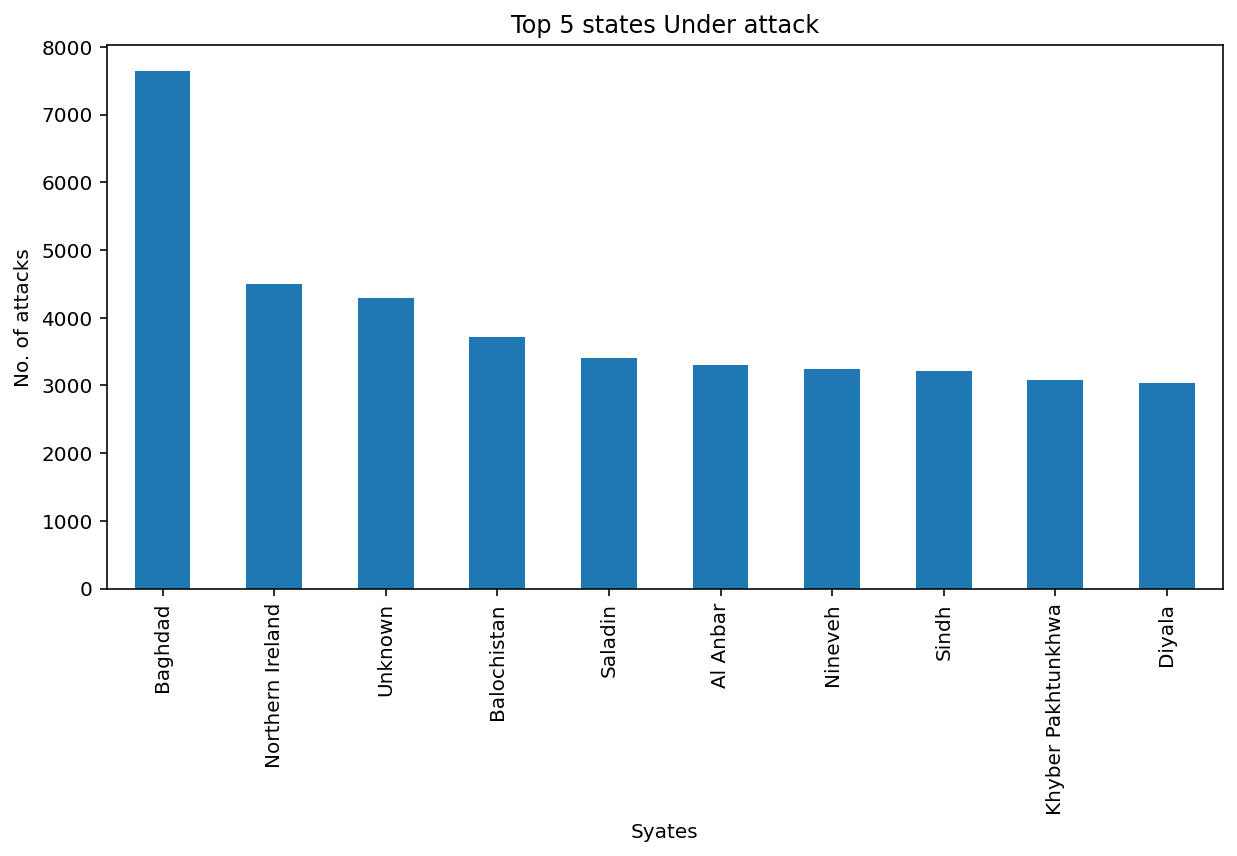

In [99]:
top_5_states.plot(kind = 'bar')

plt.title('Top 5 states Under attack')
plt.ylabel('No. of attacks')
plt.xlabel('Syates')

plt.rcParams['figure.figsize'] = (10, 5)

#COMMON ATTACK TYPE USED BY THE TERRORIST FOR ATTACKING THE TARGET.

In [108]:

common_attack_type = terrorism_data_new['attack_type'].value_counts()

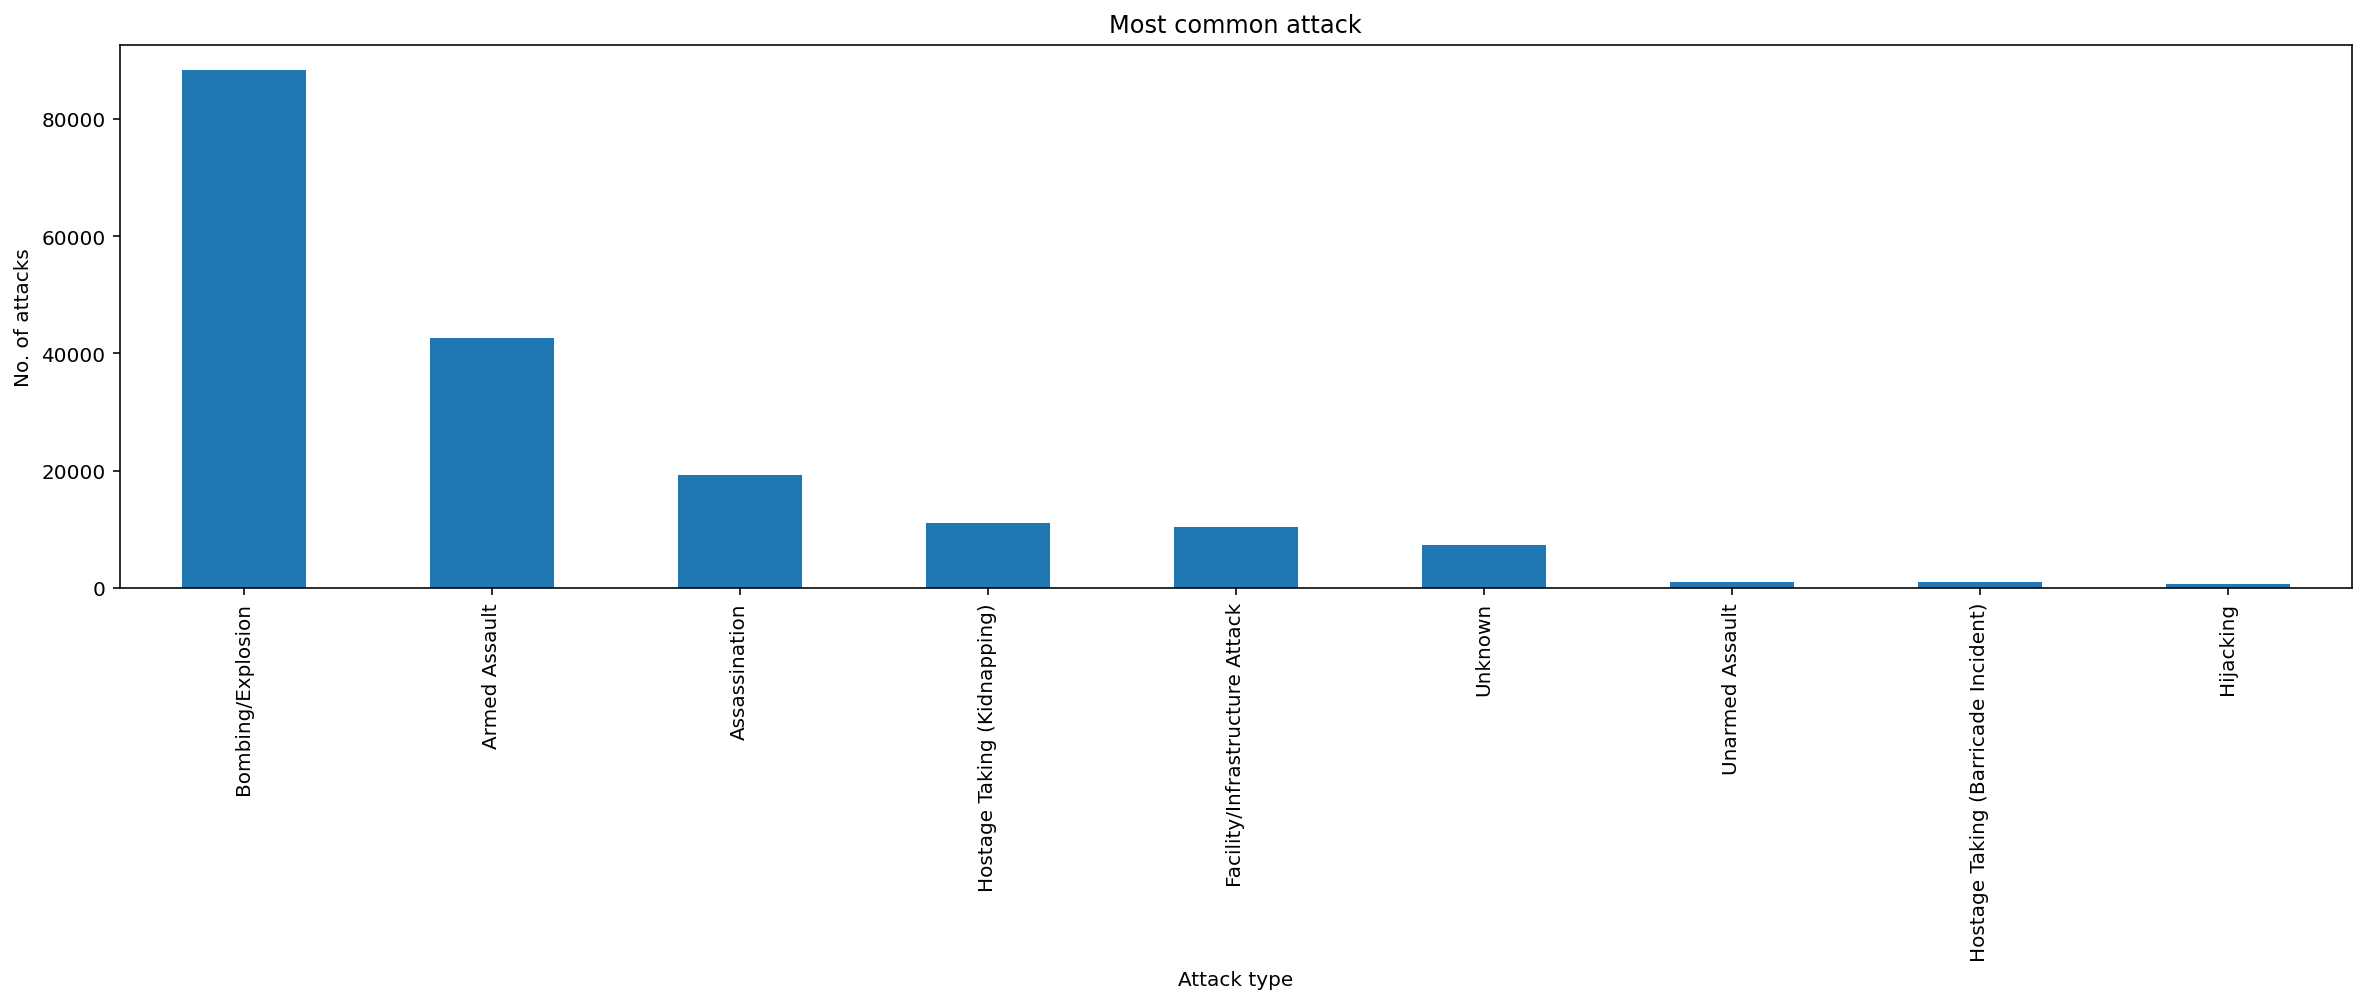

In [109]:
common_attack_type.plot(kind = 'bar')

plt.title('Most common attack')
plt.ylabel('No. of attacks')
plt.xlabel('Attack type')

plt.rcParams['figure.figsize'] = (10, 5)

#WHICH OF THE GANG ATTACKED MOST OF THE TIMES.

In [102]:
leading_gangs = terrorism_data_new['gang_name'].value_counts().head(10)

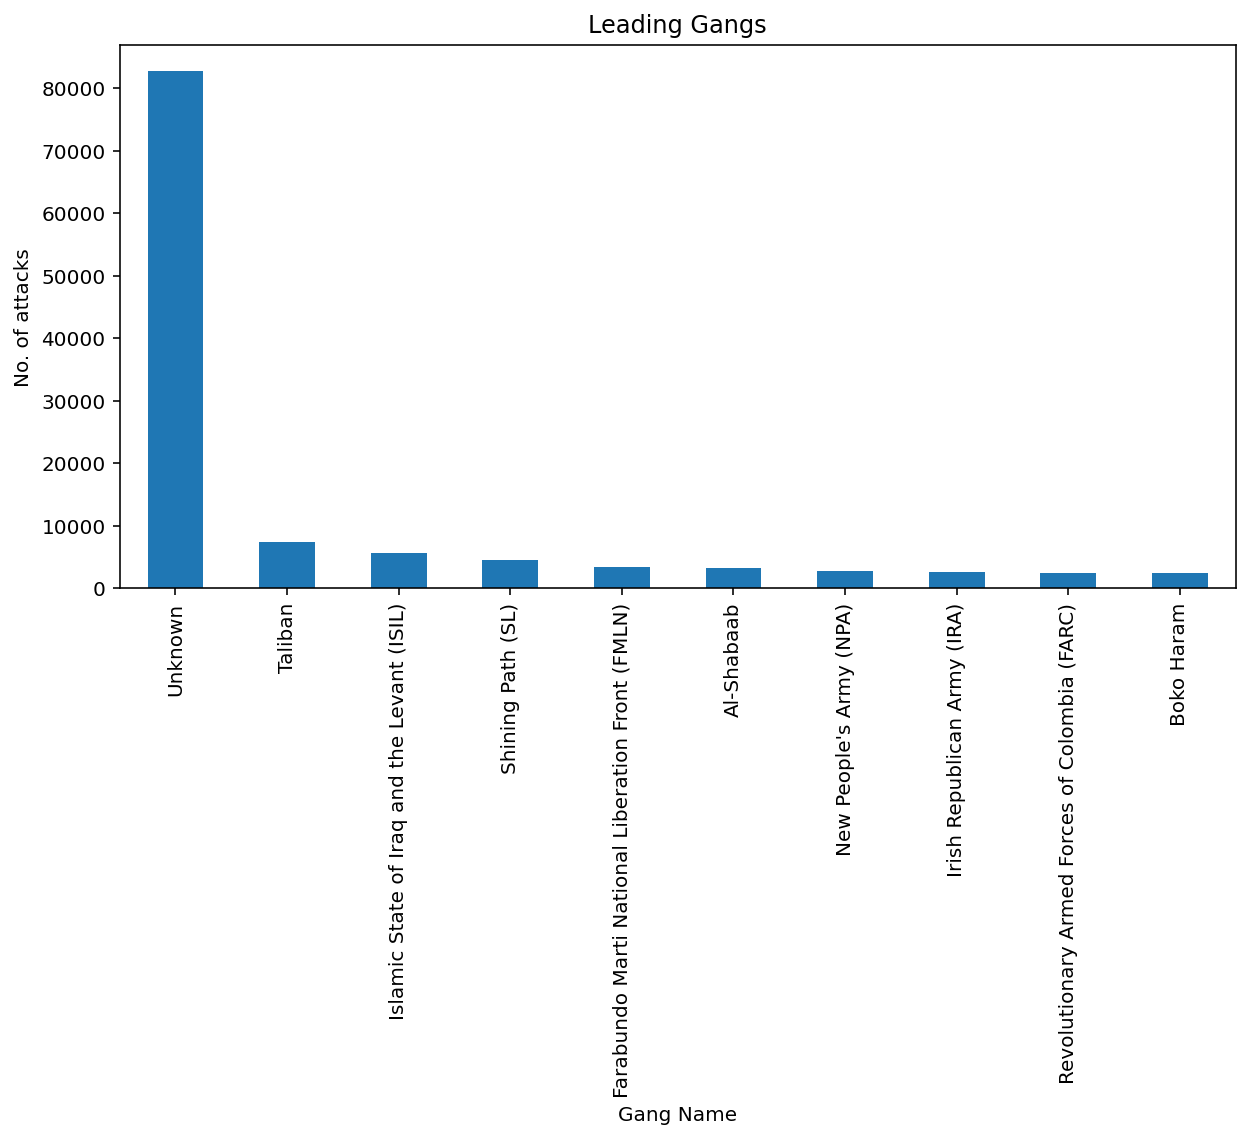

In [103]:
leading_gangs.plot(kind = 'bar')

plt.title('Leading Gangs')
plt.ylabel('No. of attacks')
plt.xlabel('Gang Name')

plt.rcParams['figure.figsize'] = (10, 5)

#MOST COMMON TARGET TYPE OF THE TERRORISTS.

In [104]:
common_targets = terrorism_data_new['target_type'].value_counts().head(10)

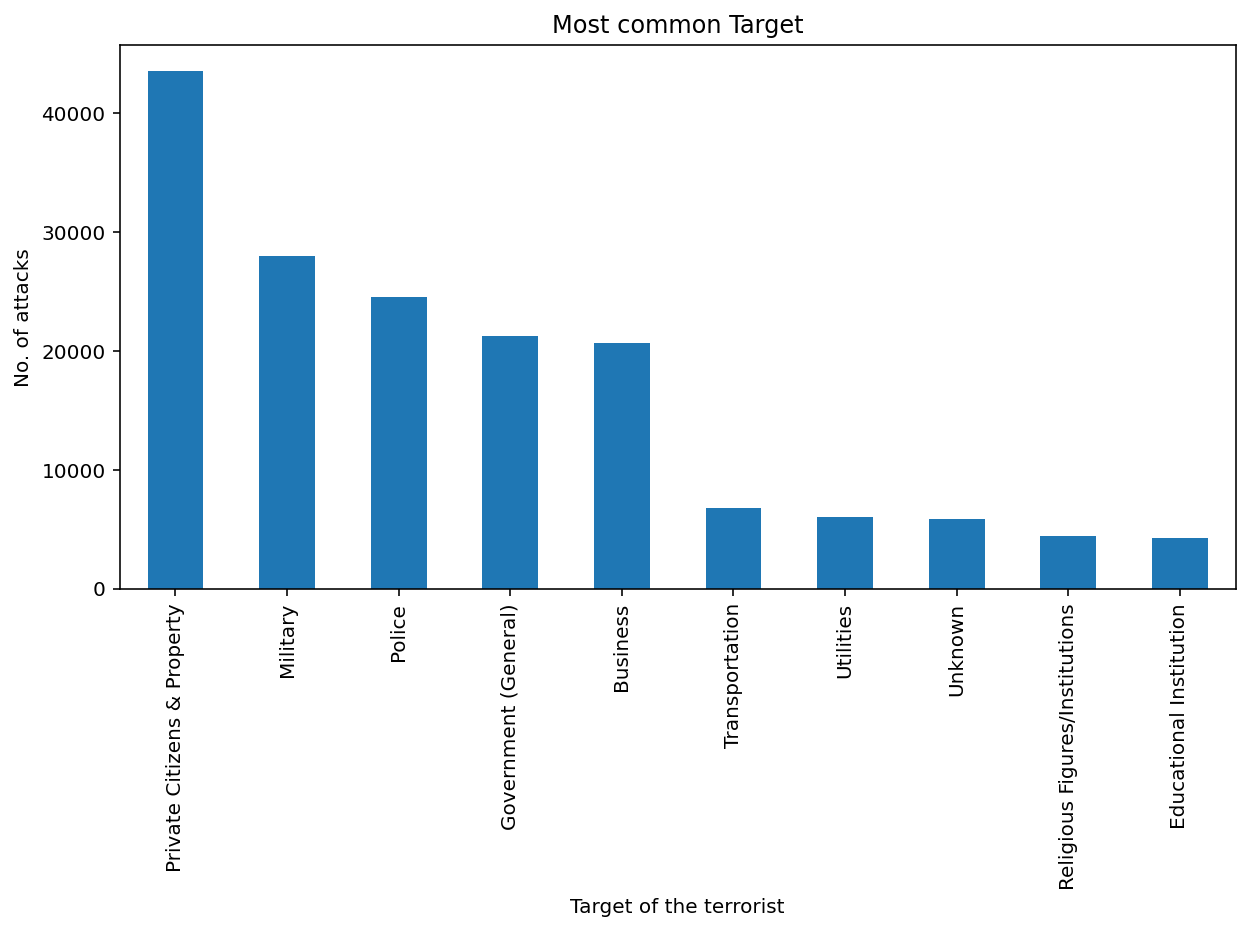

In [105]:
common_targets.plot(kind = 'bar')

plt.title('Most common Target')
plt.ylabel('No. of attacks')
plt.xlabel('Target of the terrorist')

plt.rcParams['figure.figsize'] = (10, 5)

#HIGHEST NUMBER OF CASUALTIES.

In [106]:
casualties = terrorism_data_new.groupby('year').sum()['no_of_kills']

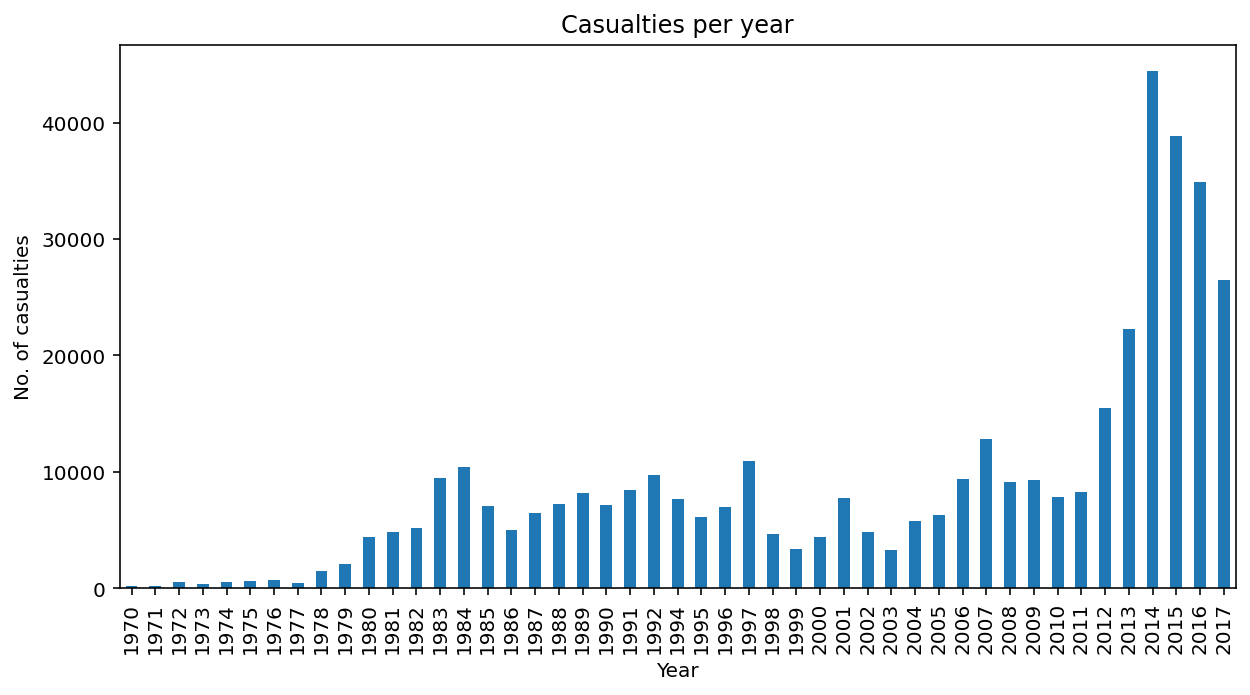

In [107]:
casualties.plot(kind = 'bar')

plt.title('Casualties per year')
plt.ylabel('No. of casualties')
plt.xlabel('Year')

plt.rcParams['figure.figsize'] = (20, 5)